Part 1: Understanding Product Categories

Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [4]:

df = df[df.columns[df.isnull().mean() < 0.8]]

In [11]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [24]:
#Generate a frequency table for the product category.
#Which are the top 5 most listed product categories?
top_categories = df["category"].value_counts().head(5)
top_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [32]:
#2. Visualizations:

#Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
#For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

category_count = pd.crosstab(index = df["category"], columns = "count")
category_count
category_count_top = category_count.sort_values(by= "count", ascending=False).head(5)
category_count_top

col_0,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978


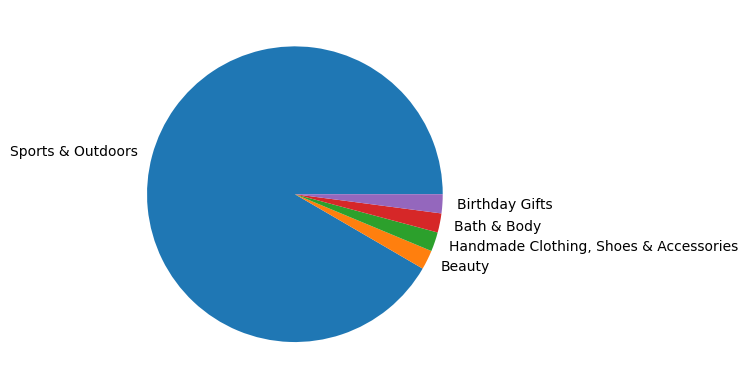

In [25]:
# pie chart of top 5 categories

fig, ax = plt.subplots()
ax.pie(top_categories.values, labels = top_categories.index)
plt.show()

C:\Users\shyam\AppData\Local\Temp\ipykernel_15484\1764168813.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= category_count_top.index, y = category_count_top["count"], palette="viridis")


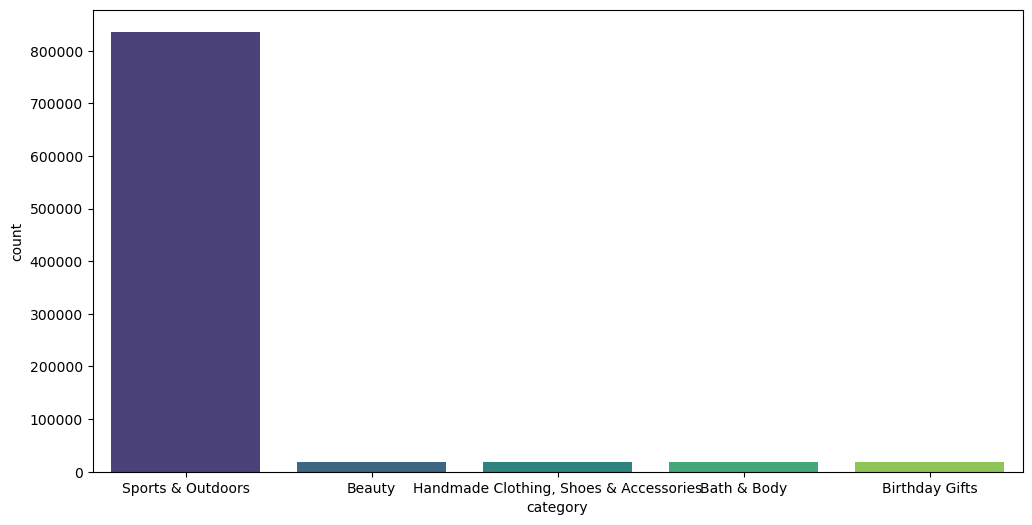

In [40]:
# bar chart for top 5 categories:
plt.figure(figsize=(12, 6))
sns.barplot(x= category_count_top.index, y = category_count_top["count"], palette="viridis")
plt.show()

Part 2: Delving into Product Pricing

Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

In [65]:
#Measures of Centrality:

#Calculate the mean, median, and mode for the price of products.
#What's the average price point of products listed? How does this compare with the most common price point (mode)?

mean_price = round(df["price"].mean(),2)
print(f"The mean price of the items is: {mean_price}")

median_price = round(df["price"].median(),2)
print(f"The median price of the items is: {median_price}")


# What's the average price point of products listed? How does this compare with the most common price point (mode)?
# 0 is the index of the mode within the series.
# To extract

mode_price = df["price"].mode()[0]
print(f"The mode price of the items is: {mode_price}")


The mean price of the items is: 89.24
The median price of the items is: 19.09
The mode price of the items is: 9.99


In [ ]:
# From the above data we can see that the most common price is $9.99 whereas the average price point is 89.24 which is almost 9 times.

Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..

Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

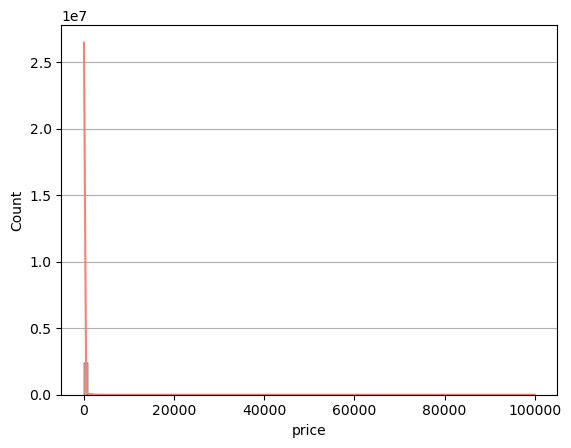

In [98]:
sns.histplot(df["price"],kde = True, bins =100, color= "salmon")
plt.grid(axis = 'y')

In [109]:
#non-visual way to find most common price
category_count = pd.crosstab(index = df["price"], columns = "count").sort_values(by="count", ascending=False).head(20)
category_count

col_0,count
price,
9.99,48922
12.99,38823
8.99,34058
7.99,33632
14.99,32570
6.99,31948
5.99,27818
19.99,27436
11.99,25488


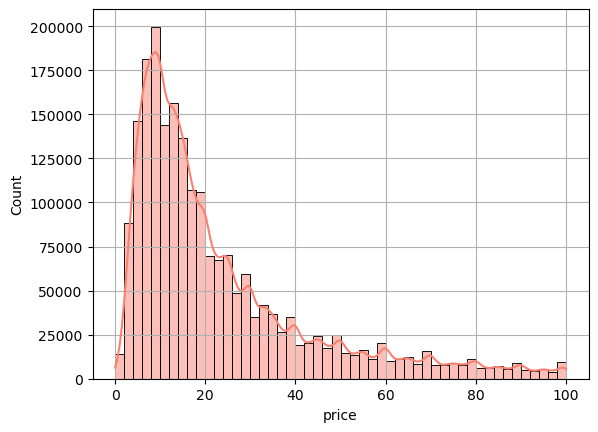

In [107]:
#Most products have price between 0 and 100 . one way is to filter the dataframe with prices less than 100
df_commonprice = df[df["price"]<100]
df_commonprice
sns.histplot(df_commonprice["price"],kde = True, bins =50, color= "salmon")
plt.grid()

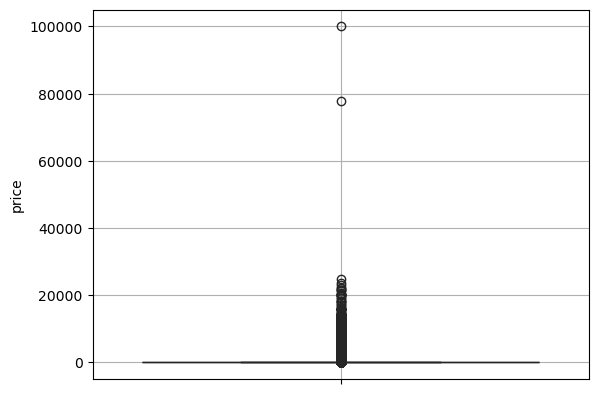

In [117]:
#Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

#df_commonprice = df[df["price"]<100]

sns.boxplot(data = df["price"], color = "green", whis = 1.5)
plt.grid()
plt.show()
# We can see few products value is extremely high compared to the most products in the line-up.

Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

In [119]:
#Measures of Centrality:

#Calculate the mean, median, and mode for the rating of products.
#How do customers generally rate products? Is there a common trend?

mean_rating = round(df["stars"].mean(),2)
print(f"The mean rating for the items is: {mean_rating}")

median_rating = round(df["stars"].median(),2)
print(f"The median rating for the items is: {median_rating}")


# What's the average price point of products listed? How does this compare with the most common price point (mode)?
# 0 is the index of the mode within the series.
# To extract

mode_rating = df["stars"].mode()[0]
print(f"The mode rating for the items is: {mode_rating}")


The mean rating for the items is: 2.15
The median rating for the items is: 0.0
The mode rating for the items is: 0.0


In [120]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [122]:
df_rated = df[df['stars']!= 0]

In [123]:
#Measures of Centrality: removing values with 0.0 rating

#Calculate the mean, median, and mode for the rating of products.
#How do customers generally rate products? Is there a common trend?
df_rated = df[df['stars']!= 0]
mean_rating = round(df_rated["stars"].mean(),2)
print(f"The mean rating for the items is: {mean_rating}")

median_rating = round(df_rated["stars"].median(),2)
print(f"The median rating for the items is: {median_rating}")

# 0 is the index of the mode within the series.
# To extract

mode_rating = df_rated["stars"].mode()[0]
print(f"The mode rating for the items is: {mode_rating}")

The mean rating for the items is: 4.32
The median rating for the items is: 4.4
The mode rating for the items is: 4.5


In [132]:
#Measures of Dispersion:

#Determine the variance, standard deviation, and interquartile range for product rating.
#Are the ratings consistent, or is there a wide variation in customer feedback?

var_rating = round(df["stars"].var(),2)
print(f"The variance for the ratings is: {var_rating}")

std_rating = round(df["stars"].std(),2)
print(f"The standard deviation for the ratings is: {std_rating}")

q1_q3_rating = round(df["stars"].quantile([0.25,0.75]),2)
IQR_rating = q1_q3_rating[0.75]-q1_q3_rating[0.25]
print(f"The interquartile range for the ratings is: {IQR_rating}")

# Since the standard deviation is very high as compared to the mean , thus there is wide variation in customer feedback. 

The variance for the ratings is: 4.82
The standard deviation for the ratings is: 2.19
The interquartile range for the ratings is: 4.4


In [138]:
#Shape of the Distribution:

#Calculate the skewness and kurtosis for the rating column.
#Are the ratings normally distributed, or do they lean towards higher or lower values?

skew_rating= df["stars"].skew()
print(f"The skewness for the ratings is: {skew_rating}")

kurtosis_rating= df["stars"].kurtosis()
print(f"The kurtosis for the ratings is: {kurtosis_rating}")


The skewness for the ratings is: 0.08120735761080985
The kurtosis for the ratings is: -1.9260061280432985


In [ ]:
# The ratings is positively skewed as it is positive. 
# Since the kurtosis is -ve and nearing -2 , hence it is a very flat distribution

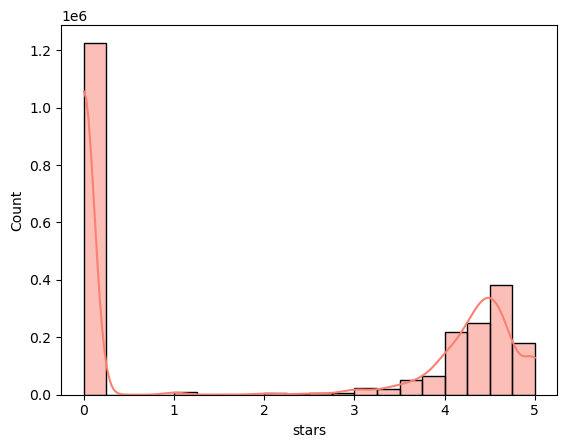

In [141]:
#Visualizations:

#Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


sns.histplot(df["stars"], kde = True, bins = 20, color = 'salmon',)
plt.show()
# From the histogram it can be seen that the rating 0.0 is significantly high.